# template matching

In [22]:
import cv2
import numpy as np

In [23]:
source_image_rgb=cv2.imread("./source.jpg")
template_image_rgb=cv2.imread("./template.jpg")

# convert both the image and template to grayscale
source_image = cv2.cvtColor(source_image_rgb, cv2.COLOR_BGR2GRAY)
template_image = cv2.cvtColor(template_image_rgb, cv2.COLOR_BGR2GRAY)
# We start by loading our image and template, then displaying

In [24]:
cv2.imshow("source_image",source_image_rgb)
cv2.imshow("template_image",template_image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# perform template matching
print("[INFO] performing template matching...")
result = cv2.matchTemplate(source_image, template_image,cv2.TM_CCOEFF_NORMED)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
print("performed....")

[INFO] performing template matching...
performed....


In [6]:
result.shape

(443, 353)

In [7]:
# determine the starting and ending (x, y)-coordinates of the
# bounding box
(startX, startY) = maxLoc
endX = startX + template_image.shape[1]
endY = startY + template_image.shape[0]

In [21]:
# draw the bounding box on the image
cv2.rectangle(source_image_rgb, (startX, startY), (endX, endY), (255, 255, 255), 4)
# show the output image
cv2.imshow("Output", source_image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
maxLoc

(179, 205)

In [15]:
template_image.shape

(58, 148)

In [26]:
res = cv2.matchTemplate(source_image,template_image,cv2.TM_CCOEFF_NORMED)   
# Declare a threshold   
threshold = 0.8  
# Store the coordinates of matched location in a numpy array   
loc = np.where(res >= threshold)   
w, h = template_image.shape  
# Draw the rectangle around the matched region.   
for pt in zip(*loc[::-1]):   
    cv2.rectangle(source_image_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)   
# Now display the final matched template image   
# cv2.imshow('Detected',source_image_rgb)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [31]:
for x in zip(*loc[::-1]):
    print(x)

(179, 204)
(180, 204)
(179, 205)
(178, 206)
(179, 206)


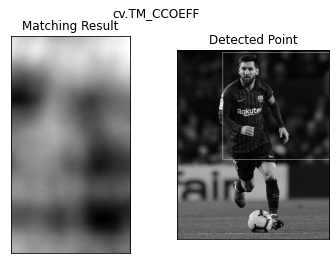

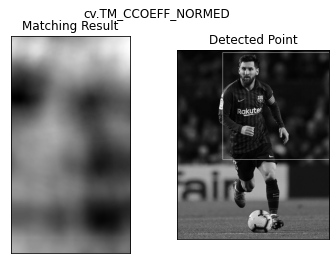

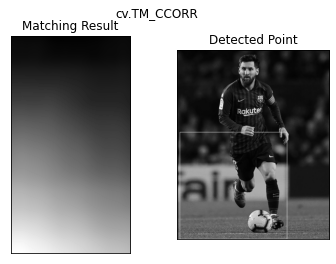

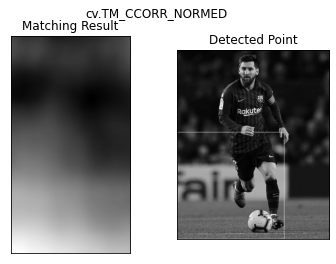

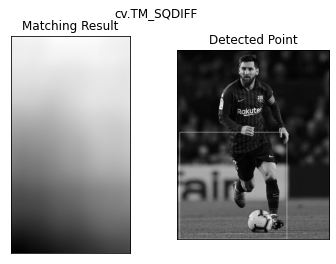

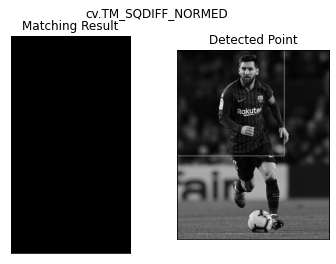

In [67]:
# cv2 defualt
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./messi.jpg',0)
img2 = img.copy()
template = cv.imread('./head.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

# Template Matching with Multiple Objects

In [66]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_rgb = cv2.imread('./mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./mario_coin.jpeg',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.43
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imshow('res.png',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()